# Assignment 2

---

#### Name: 
#### Student ID: 

---

## Basic imports

In [1]:
from IPython.display import display

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

## Color map for confusion matrix

In [2]:
cmap = mpl.colors.LinearSegmentedColormap.from_list("", ["#fff4de",'#ffcb64',"#9ad7d2","#66aaa2"])

## Load preprocessed data

In [3]:
student_data = pd.read_csv("../data/student-por.csv.xz").sample(frac=1).reset_index(drop=True)
display(student_data.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,20,R,GT3,T,1,1,other,other,...,3,2,2,1,3,3,8,11,15,B
1,GP,M,15,U,LE3,T,4,4,health,services,...,4,3,3,1,3,5,0,12,13,C
2,MS,M,15,U,GT3,T,3,3,services,services,...,4,3,3,2,4,3,11,12,10,D
3,MS,F,17,R,GT3,T,2,1,at_home,other,...,5,5,3,1,1,3,2,9,10,D
4,GP,F,16,U,GT3,T,3,2,other,other,...,1,2,2,1,2,1,8,14,15,A


## Split features and labels

In [4]:
student_le = LabelEncoder()
student_le_binary = LabelEncoder()
student_le_binary.classes_ = np.array(['Pass', 'Failed'])
student_feature = pd.get_dummies(student_data.iloc[:, :-1], drop_first=True).to_numpy(dtype=np.int8)
student_label = student_data.iloc[:, -1]
student_label = student_le.fit_transform(student_label).astype(np.int8)
student_label_binary = (student_label == 4).astype(np.int8)

## Function for drawing confusion matrix and reports

In [5]:
def generate_report(y_true, y_pred, le):
    matrix = confusion_matrix(y_true, y_pred)
    fig = plt.figure()
    ax = fig.add_subplot()
    dsp = ConfusionMatrixDisplay(matrix)

    dsp.plot(cmap=cmap, ax=ax, values_format='d')
    ax.set_xticklabels(le.classes_, ha='right')
    ax.set_yticklabels(le.classes_)
    fig.show()

    print("Accuracy: {:.6f}".format(accuracy_score(y_true, y_pred)))

    display(
        pd.DataFrame(
            (x.split()[1:] for x in [x for x in classification_report(y_true, y_pred).splitlines() if x][1:-3]),
            columns=['precision', 'recall', 'f1-score', 'support'],
            index=le.classes_
        )
    )

    
def decision_boundary(model, x, y):
    x_t = x[:, 13:15]
    model.fit(x_t, y)
    x_min, x_max = x_t[:, 0].min() - 1, x_t[:, 0].max() + 1
    y_min, y_max = x_t[:, 1].min() - 1, x_t[:, 1].max() + 1

    cmap_light = ListedColormap(['orange', 'blue'])
    cmap_bold = ListedColormap(['darkorange', 'darkblue'])

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                         np.arange(y_min, y_max, 0.05))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    fig = plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(x_t[:, 0], x_t[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    return fig


## Holdout validation

In [6]:
x_train_binary, x_test_binary, y_train_binary, y_test_binary = train_test_split(student_feature, student_label_binary, test_size=0.3)
x_train, x_test, y_train, y_test = train_test_split(student_feature, student_label, test_size=0.3)

### Decision Tree
- sklearn use CART(Classification and Regression Trees) as it decision tree algorithm

#### Binary classification


Accuracy: 0.876923


,precision,recall,f1-score,support
Pass,0.92,0.94,0.93,161
Failed,0.67,0.59,0.62,34


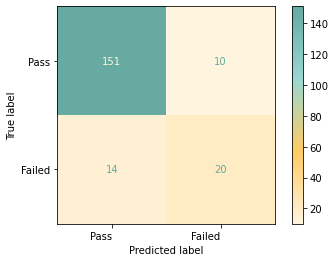

In [7]:
decision_tree_binary = DecisionTreeClassifier()
decision_tree_binary.fit(x_train_binary, y_train_binary)
y_pred = decision_tree_binary.predict(x_test_binary)
generate_report(y_test_binary, y_pred, student_le_binary)


#### 5-Level classification

Accuracy: 0.646154


,precision,recall,f1-score,support
A,0.79,0.76,0.78,25
B,0.43,0.44,0.44,36
C,0.54,0.64,0.59,45
D,0.77,0.71,0.74,56
F,0.79,0.67,0.72,33


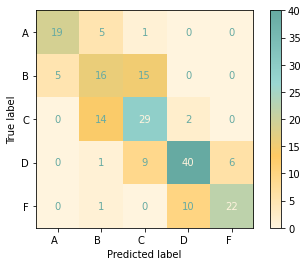

In [8]:
decision_tree_binary = DecisionTreeClassifier()
decision_tree_binary.fit(x_train, y_train)
y_pred = decision_tree_binary.predict(x_test)
generate_report(y_test, y_pred, student_le)

### Random Forest
- Set `bootstrap=True` will enable randomly select $\sqrt{n\_features}$ features
- Set `bootstrap=True` and `max_sample=0.8` will enable randomly select $0.8*n\_samples$ samples
- Tries 3, 10, 20 trees in the forest.
- Random Forest is using a lot of decision tree then vote for result.
- KFold is split train/test set into K parts then average performance.

#### Binary classification

3 trees
Accuracy: 0.917949


,precision,recall,f1-score,support
Pass,0.91,1.00,0.95,161
Failed,1.00,0.53,0.69,34


10 trees
Accuracy: 0.902564


,precision,recall,f1-score,support
Pass,0.90,0.99,0.94,161
Failed,0.89,0.50,0.64,34


20 trees
Accuracy: 0.923077


,precision,recall,f1-score,support
Pass,0.92,0.99,0.95,161
Failed,0.91,0.62,0.74,34


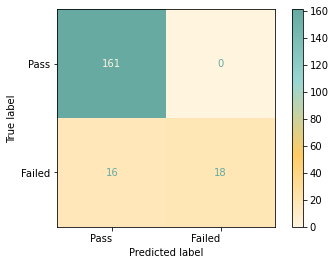

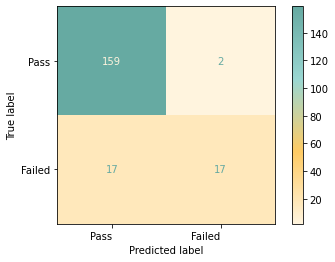

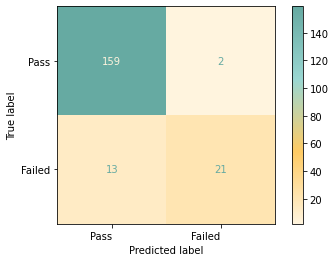

In [9]:
for i in (3, 10, 20):
    random_forest = RandomForestClassifier(n_estimators=i, bootstrap=True, max_samples=0.8)
    random_forest.fit(x_train_binary, y_train_binary)
    print(i, "trees")
    y_pred = random_forest.predict(x_test_binary)
    generate_report(y_test_binary, y_pred, student_le_binary)



#### 5-Level classification

3 trees
Accuracy: 0.461538


,precision,recall,f1-score,support
A,0.45,0.76,0.57,25
B,0.28,0.31,0.29,36
C,0.40,0.42,0.41,45
D,0.64,0.54,0.58,56
F,0.55,0.33,0.42,33


10 trees
Accuracy: 0.605128


,precision,recall,f1-score,support
A,0.67,0.64,0.65,25
B,0.48,0.44,0.46,36
C,0.52,0.67,0.58,45
D,0.67,0.62,0.65,56
F,0.75,0.64,0.69,33


20 trees
Accuracy: 0.707692


,precision,recall,f1-score,support
A,0.85,0.68,0.76,25
B,0.61,0.56,0.58,36
C,0.67,0.78,0.72,45
D,0.71,0.84,0.77,56
F,0.79,0.58,0.67,33


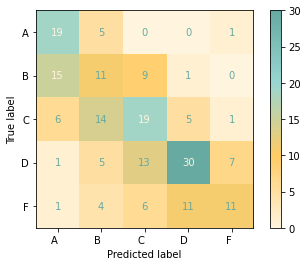

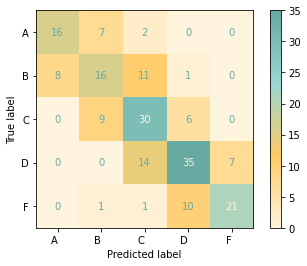

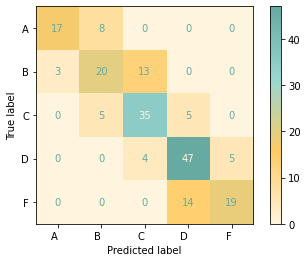

In [10]:
for i in (3, 10, 20):
    random_forest = RandomForestClassifier(n_estimators=i, bootstrap=True, max_samples=0.8)
    random_forest.fit(x_train, y_train)
    print(i, "trees")
    y_pred = random_forest.predict(x_test)
    generate_report(y_test, y_pred, student_le)

### KNN
- Normalize all features.
- Tries 5, 10, 20 neighbors.

#### Binary classification

5 neighbors
Accuracy: 0.820513


,precision,recall,f1-score,support
Pass,0.83,0.98,0.90,161
Failed,0.40,0.06,0.10,34


10 neighbors
Accuracy: 0.825641


,precision,recall,f1-score,support
Pass,0.83,1.00,0.90,161
Failed,0.00,0.00,0.00,34


20 neighbors
Accuracy: 0.825641


,precision,recall,f1-score,support
Pass,0.83,1.00,0.90,161
Failed,0.00,0.00,0.00,34


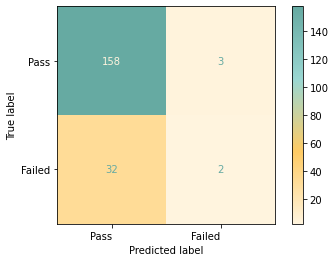

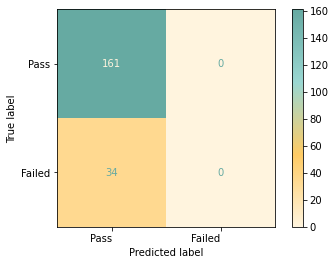

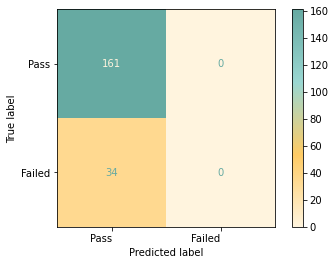

In [11]:
x_train_binary_norm = x_train_binary / x_train_binary.max(axis=0)
x_test_binary_norm = x_test_binary / x_test_binary.max(axis=0)

for i in (5, 10, 20):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_binary_norm, y_train_binary)
    print(i, "neighbors")
    y_pred = knn.predict(x_test_binary_norm)
    generate_report(y_test_binary, y_pred, student_le_binary)

#### 5-Level classification

5 neighbors
Accuracy: 0.312821


,precision,recall,f1-score,support
A,0.33,0.32,0.33,25
B,0.31,0.39,0.35,36
C,0.23,0.29,0.26,45
D,0.34,0.39,0.37,56
F,0.67,0.12,0.21,33


10 neighbors
Accuracy: 0.287179


,precision,recall,f1-score,support
A,0.28,0.20,0.23,25
B,0.24,0.25,0.25,36
C,0.16,0.22,0.18,45
D,0.40,0.52,0.45,56
F,0.75,0.09,0.16,33


20 neighbors
Accuracy: 0.323077


,precision,recall,f1-score,support
A,0.17,0.04,0.06,25
B,0.14,0.08,0.10,36
C,0.29,0.51,0.37,45
D,0.40,0.59,0.47,56
F,0.60,0.09,0.16,33


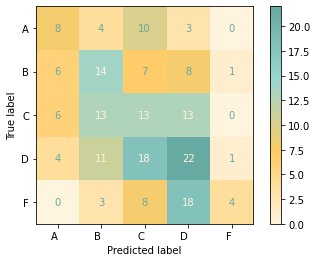

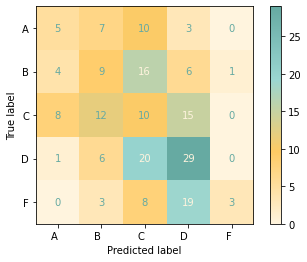

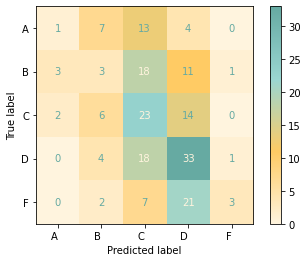

In [12]:
x_train_norm = x_train / x_train.max(axis=0)
x_test_norm = x_test / x_test.max(axis=0)

for i in (5, 10, 20):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_norm, y_train)
    print(i, "neighbors")
    y_pred = knn.predict(x_test_norm)
    generate_report(y_test, y_pred, student_le)

## K-fold cross-validation

In [13]:
kf = KFold(n_splits=3)

### Decision Tree

#### Binary classification

Accuracy: 0.906009


,precision,recall,f1-score,support
Pass,0.94,0.95,0.94,549
Failed,0.70,0.69,0.69,100


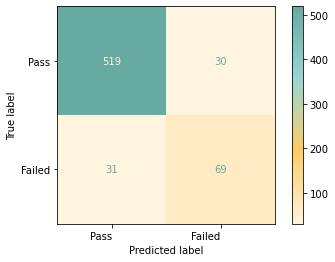

In [14]:
decision_tree_binary = DecisionTreeClassifier()
y_true = np.array([])
y_pred = np.array([])
for train_index, test_index in kf.split(student_feature):
    x_train_binary, x_test_binary = student_feature[train_index], student_feature[test_index]
    y_train_binary, y_test_binary = student_label_binary[train_index], student_label_binary[test_index]
    decision_tree_binary.fit(x_train_binary, y_train_binary)
    y_true = np.append(y_true, y_test_binary)
    y_pred = np.append(y_pred, decision_tree_binary.predict(x_test_binary))
generate_report(y_true, y_pred, student_le_binary)

#### 5-Level classification

Accuracy: 0.644068


,precision,recall,f1-score,support
A,0.73,0.77,0.75,82
B,0.48,0.47,0.48,112
C,0.58,0.57,0.58,154
D,0.71,0.72,0.72,201
F,0.70,0.69,0.70,100


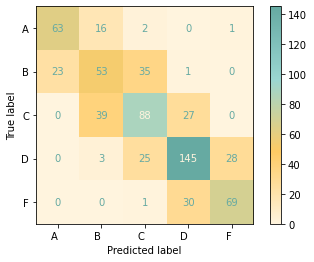

In [15]:
decision_tree_5level = DecisionTreeClassifier()
y_true = np.array([])
y_pred = np.array([])
for train_index, test_index in kf.split(student_feature):
    x_train, x_test = student_feature[train_index], student_feature[test_index]
    y_train, y_test = student_label[train_index], student_label[test_index]
    decision_tree_5level.fit(x_train, y_train)
    y_true = np.append(y_true, y_test)
    y_pred = np.append(y_pred, decision_tree_5level.predict(x_test))
generate_report(y_true, y_pred, student_le)

### Random Forest

#### Binary classification

3 trees
Accuracy: 0.926040


,precision,recall,f1-score,support
Pass,0.96,0.95,0.96,549
Failed,0.75,0.78,0.76,100


10 trees
Accuracy: 0.921418


,precision,recall,f1-score,support
Pass,0.93,0.98,0.95,549
Failed,0.84,0.61,0.71,100


20 trees
Accuracy: 0.924499


,precision,recall,f1-score,support
Pass,0.93,0.98,0.96,549
Failed,0.86,0.61,0.71,100


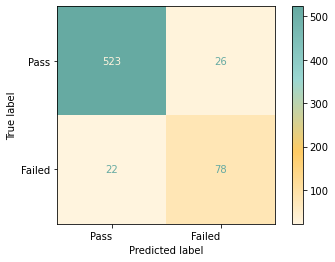

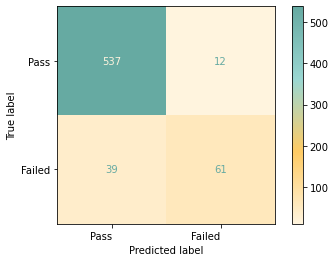

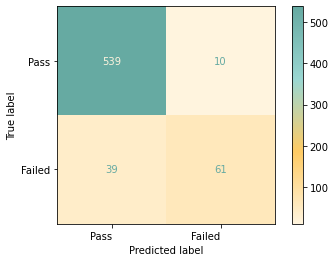

In [16]:
for i in (3, 10, 20):
    random_forest = RandomForestClassifier(n_estimators=i, bootstrap=True, max_samples=0.8)
    print(i, "trees")
    y_true = np.array([])
    y_pred = np.array([])
    for train_index, test_index in kf.split(student_feature):
        x_train_binary, x_test_binary = student_feature[train_index], student_feature[test_index]
        y_train_binary, y_test_binary = student_label_binary[train_index], student_label_binary[test_index]
        random_forest.fit(x_train_binary, y_train_binary)
        y_true = np.append(y_true, y_test_binary)
        y_pred = np.append(y_pred, random_forest.predict(x_test_binary))
    generate_report(y_true, y_pred, student_le_binary)

#### 5-Level classification

3 trees
Accuracy: 0.543914


,precision,recall,f1-score,support
A,0.54,0.68,0.60,82
B,0.37,0.43,0.40,112
C,0.46,0.40,0.43,154
D,0.64,0.70,0.67,201
F,0.75,0.46,0.57,100


10 trees
Accuracy: 0.653313


,precision,recall,f1-score,support
A,0.70,0.78,0.74,82
B,0.48,0.41,0.44,112
C,0.61,0.56,0.59,154
D,0.69,0.83,0.75,201
F,0.78,0.62,0.69,100


20 trees
Accuracy: 0.667180


,precision,recall,f1-score,support
A,0.77,0.82,0.79,82
B,0.51,0.49,0.50,112
C,0.60,0.54,0.57,154
D,0.70,0.84,0.76,201
F,0.80,0.59,0.68,100


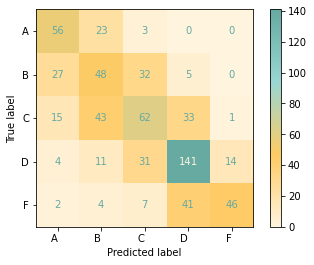

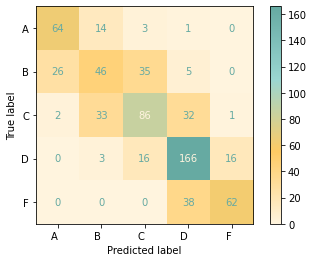

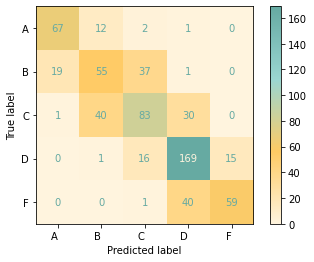

In [17]:
for i in (3, 10, 20):
    random_forest = RandomForestClassifier(n_estimators=i, bootstrap=True, max_samples=0.8)
    print(i, "trees")
    y_true = np.array([])
    y_pred = np.array([])
    for train_index, test_index in kf.split(student_feature):
        x_train, x_test = student_feature[train_index], student_feature[test_index]
        y_train, y_test = student_label[train_index], student_label[test_index]
        random_forest.fit(x_train, y_train)
        y_true = np.append(y_true, y_test)
        y_pred = np.append(y_pred, random_forest.predict(x_test))
    generate_report(y_true, y_pred, student_le)

### KNN

#### Binary classification

5 neighbors
Accuracy: 0.909091


,precision,recall,f1-score,support
Pass,0.92,0.98,0.95,549
Failed,0.84,0.51,0.63,100


10 neighbors
Accuracy: 0.899846


,precision,recall,f1-score,support
Pass,0.90,0.99,0.94,549
Failed,0.89,0.40,0.55,100


20 neighbors
Accuracy: 0.892142


,precision,recall,f1-score,support
Pass,0.89,0.99,0.94,549
Failed,0.92,0.33,0.49,100


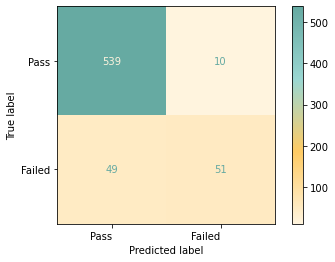

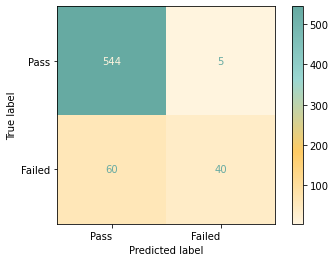

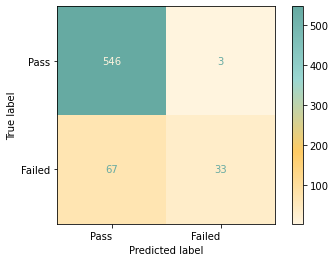

In [18]:
for i in (5, 10, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    y_true = np.array([])
    y_pred = np.array([])
    print(i, "neighbors")
    for train_index, test_index in kf.split(student_feature):
        x_train_binary, x_test_binary = student_feature[train_index], student_feature[test_index]
        y_train_binary, y_test_binary = student_label_binary[train_index], student_label_binary[test_index]
        knn.fit(x_train_binary, y_train_binary)
        y_true = np.append(y_true, y_test_binary)
        y_pred = np.append(y_pred, knn.predict(x_test_binary))
    generate_report(y_true, y_pred, student_le_binary)

#### 5-Level classification

5 neighbors
Accuracy: 0.624037


,precision,recall,f1-score,support
A,0.74,0.73,0.74,82
B,0.50,0.46,0.47,112
C,0.55,0.62,0.58,154
D,0.65,0.73,0.69,201
F,0.82,0.51,0.63,100


10 neighbors
Accuracy: 0.636364


,precision,recall,f1-score,support
A,0.82,0.74,0.78,82
B,0.57,0.47,0.52,112
C,0.55,0.64,0.59,154
D,0.62,0.78,0.69,201
F,0.88,0.44,0.59,100


20 neighbors
Accuracy: 0.656394


,precision,recall,f1-score,support
A,0.85,0.71,0.77,82
B,0.62,0.48,0.54,112
C,0.60,0.70,0.65,154
D,0.62,0.84,0.71,201
F,0.90,0.37,0.52,100


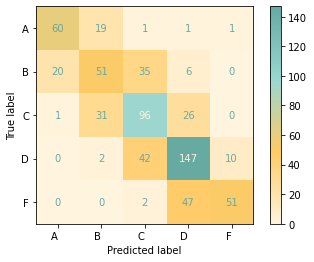

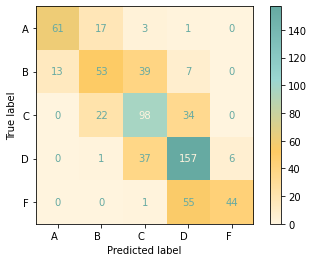

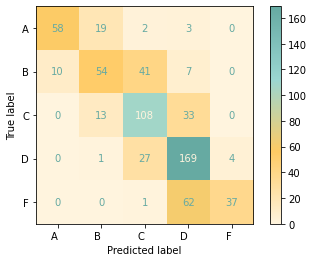

In [19]:
for i in (5, 10, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    y_true = np.array([])
    y_pred = np.array([])
    print(i, "neighbors")
    for train_index, test_index in kf.split(student_feature):
        x_train, x_test = student_feature[train_index], student_feature[test_index]
        y_train, y_test = student_label[train_index], student_label[test_index]
        knn.fit(x_train, y_train)
        y_true = np.append(y_true, y_test)
        y_pred = np.append(y_pred, knn.predict(x_test))
    generate_report(y_true, y_pred, student_le)